In [1]:
import sys
sys.path.append('..')
% matplotlib inline

In [2]:
from aitoolkit import ObjectDetector
detector = ObjectDetector(num_of_detection=2, train_data_dir = 'data/object_detection/train/',\
                          validation_data_dir = 'data/object_detection/validation/', result_data_dir = 'results')

Using TensorFlow backend.


In [3]:
detector.create_model()

In [4]:
detector.get_model_summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 150, 150, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 150, 150, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 150, 150, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 75, 75, 64)    0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [5]:
labels = ['cats', 'dogs']
detector.create_datasets(labels)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Epoch 1
Epoch 1/3
Index 1
[ 0.67720562  0.32279435]


/Users/YumaKajihara/.pyenv/versions/anaconda2-2.5.0/lib/python2.7/site-packages/keras/engine/training.py:1527: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


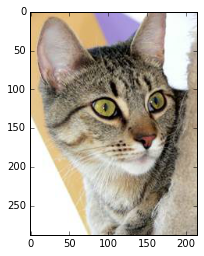

Index 2
[ 0.54012752  0.45987251]


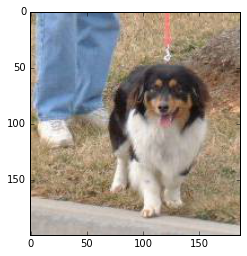

32/10 [================================================================================================] - 346s - loss: 0.9105 - acc: 0.4375 - val_loss: 0.7582 - val_acc: 0.5085
Epoch 2
Epoch 2/3
Index 1
[ 0.65218246  0.34781757]


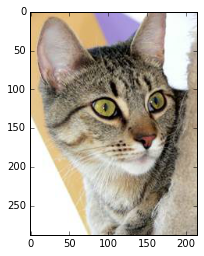

Index 2
[ 0.50681007  0.4931899 ]


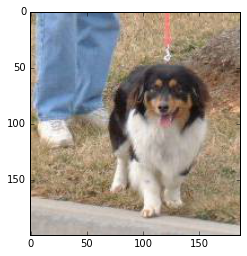

32/10 [================================================================================================] - 349s - loss: 1.5176 - acc: 0.2500 - val_loss: 0.7375 - val_acc: 0.5355
Epoch 3
Epoch 3/3
Index 1
[ 0.62180865  0.37819132]


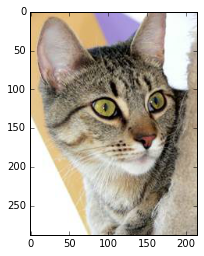

Index 2
[ 0.46575123  0.53424883]


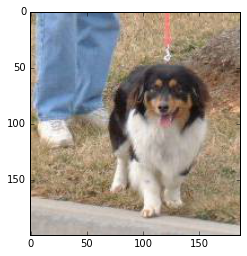

32/10 [================================================================================================] - 347s - loss: 1.0580 - acc: 0.4375 - val_loss: 0.7106 - val_acc: 0.5440


In [6]:
detector.fit(nb_train_samples = 10, nb_validation_samples = 700, nb_epoch = 3)

In [10]:
import os
result = os.path.join(detector.result_data_dir, "object_detection.txt")
history = detector.history
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
nb_epoch = len(acc)
with open(result, "w") as f:
    f.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
    for i in range(nb_epoch):
        f.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [22]:
from keras.preprocessing import image
import numpy as np
def image_to_tensor__(filename, img_height, img_width):
    img = image.load_img(filename, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # normalization
    x = x / 255.0
    return x

In [27]:
# detector.detect("./train/cat.1402.jpg ")
input_tensor = image_to_tensor__("detect_data/dog1.jpg", detector.img_height, detector.img_width)
detection = detector.model.predict(input_tensor)[0]
print detection

[ 0.8975932]
